# E-Learning Market Analysis



The goal of this project to find two domains in which it is beneficial to advertise an e-learning company that offers courses on programming. Most of the courses provided by the company are on mobile and web development, but it also covers areas such as data science and game development.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
%%capture --no-stdout --
coder_survey = pd.read_csv("2017-fCC-New-Coders-Survey-Data.csv")

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning:

Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
coder_survey.shape

(18175, 136)

In [4]:
coder_survey.head()

Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls         ...           \
0                   NaN                   NaN         ...            
1                   NaN                   NaN         ...            
2                   NaN                   NaN         ...            
3                   NaN                   NaN         ...            
4                   NaN                   NaN         ...            

   YouTubeFCC  YouTubeFunFunFunction  YouTubeGoogleDev  YouTubeLearnCode  \
0         NaN                    NaN               NaN               NaN   
1         1.0                    NaN               NaN               NaN   
2         NaN                    NaN               NaN               1.0   
3         1.0                    1.0               NaN               NaN   
4         NaN                    NaN               NaN               NaN   

   YouTubeLevelUpTuts  YouTubeMIT  YouTubeMozillaHacks YouTubeOther  \
0                 NaN         NaN                  NaN          NaN   
1                 NaN         NaN                  NaN          NaN   
2                 1.0         NaN                  NaN          NaN   
3                 1.0         NaN                  NaN          NaN   
4                 NaN         NaN                  NaN          NaN   

   YouTubeSimplilearn  YouTubeTheNewBoston  
0                 NaN                  NaN  
1                 NaN                  NaN  
2                 NaN                  NaN  
3                 NaN                  NaN  
4                 NaN                  NaN  

[5 rows x 136 columns]

In [5]:
coder_survey.columns

Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

To determine which kind of content is trending right now we use an existing data set to see if we can answer some of our questions without having to carry out an expensive survey. The data set is provided by freeCodeCamp which conducted a survey asking coders question about their exposure do different kinds of bootcamps and educational channels. The raw data is available publicly in their GitHub repository.

In [6]:
freq_table = (coder_survey["JobRoleInterest"]
             .value_counts(normalize=True))

In [7]:
freq_table

Full-Stack Web Developer                                                                                                                                                                                                                                                    0.117706
  Front-End Web Developer                                                                                                                                                                                                                                                   0.064359
  Data Scientist                                                                                                                                                                                                                                                            0.021739
Back-End Web Developer                                                                                                                                                   

([<matplotlib.axis.XTick at 0x7ff9141ef3c8>,
 <a list of 7 Text xticklabel objects>)

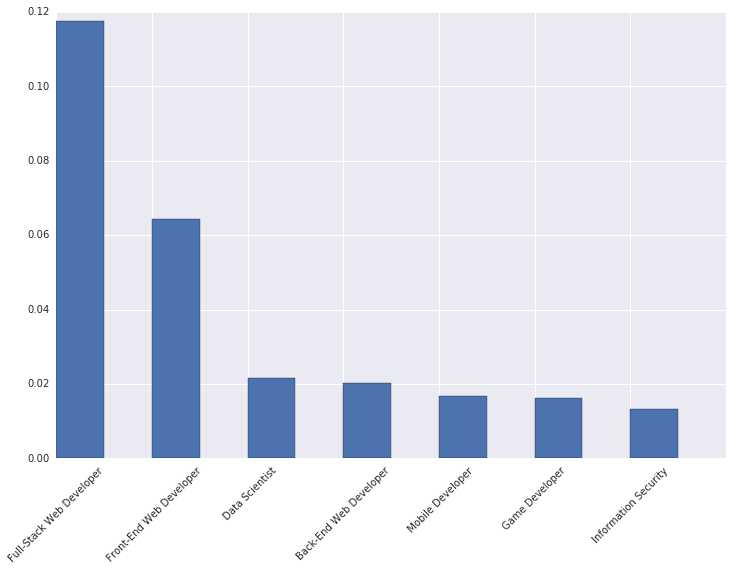

In [8]:
plt.figure(figsize=(12, 8))
plt.bar(range(7), freq_table[:7], width=0.5)
plt.xticks(pd.Series(range(7)), freq_table.index[:10], rotation = 45)

To begin with we make a frequency table for the jobs survey takers are interested in. In the graph above we show 7 most frequent wanted job roles and notice that we have four categories related to web and mobile development that we focus on. By looking at the frequency table we observe that the plot above contains incomplete information, as some of the survey takers are interested in multitude of roles.

In the next part we will try to find out which two countries make for the best markets for our advertisement campaign.

In [9]:
coder_survey_clean = coder_survey.copy()[coder_survey["JobRoleInterest"].notnull()]

In [10]:
coder_survey_clean["CountryLive"].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Philippines                        52
Serbia                             52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Argentina   

In [11]:
coder_survey_clean["CountryLive"].value_counts(normalize=True)

United States of America         0.457005
India                            0.077216
United Kingdom                   0.046066
Canada                           0.038023
Poland                           0.019158
Brazil                           0.018865
Germany                          0.018280
Australia                        0.016379
Russia                           0.014917
Ukraine                          0.013016
Nigeria                          0.012284
Spain                            0.011261
France                           0.010968
Romania                          0.010383
Netherlands (Holland, Europe)    0.009506
Italy                            0.009067
Philippines                      0.007605
Serbia                           0.007605
Greece                           0.006727
Ireland                          0.006288
South Africa                     0.005703
Mexico                           0.005411
Turkey                           0.005265
Singapore                        0

Based on the simple frequency analysis we can see that the most promising markets for advertisement are USA and India. However, since we focus on web and mobile development mostly, we need to to also confirm that the community interest 

In [12]:
mask = coder_survey_clean["MonthsProgramming"] == 0

In [13]:
coder_survey_clean.loc[mask, "MonthsProgramming"] = 1

In [14]:
coder_survey_clean["MoneyPerMonth"] = coder_survey_clean["MoneyForLearning"] / coder_survey_clean["MonthsProgramming"]

In [15]:
coder_survey_clean["MoneyPerMonth"].isnull().sum()

675

In [16]:
coder_survey_clean = coder_survey_clean.copy()[coder_survey_clean["MoneyPerMonth"].notnull()]

In [17]:
coder_survey_clean["MoneyPerMonth"].isnull().sum()

0

In [18]:
coder_survey_clean["CountryLive"].isnull().sum()

105

In [19]:
coder_survey_clean = coder_survey_clean.copy()[coder_survey_clean["CountryLive"].notnull()]

In [20]:
coder_survey_clean["CountryLive"].isnull().sum()

0

In [21]:
mask = ((coder_survey_clean["CountryLive"] == "United States of America") |
        (coder_survey_clean["CountryLive"] == "India") |
        (coder_survey_clean["CountryLive"] == "Canada") |
        (coder_survey_clean["CountryLive"] == "United Kingdom"))

In [22]:
coder_survey_clean = coder_survey_clean.loc[mask]

In [23]:
coder_survey_clean.groupby("CountryLive").mean()["MoneyPerMonth"]

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: MoneyPerMonth, dtype: float64

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

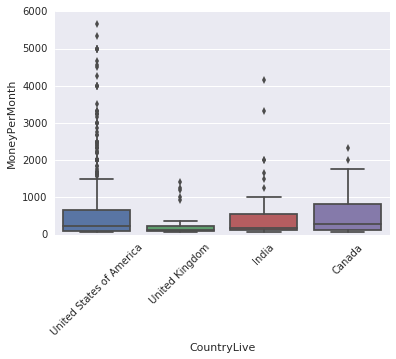

In [34]:
%%capture --no-stdout --no-display
sns.boxplot(x="CountryLive", y="MoneyPerMonth", data=coder_survey_clean)
plt.xticks(rotation=45)

In [25]:
filter1 = ((coder_survey_clean["CountryLive"] == "United States of America") &
        (coder_survey_clean["MoneyPerMonth"] < 6000))

In [26]:
filter2 = ((coder_survey_clean["CountryLive"] == "India") & 
          (coder_survey_clean["MoneyPerMonth"] < 5000))

In [27]:
filter3 = ((coder_survey_clean["CountryLive"] == "Canada") &
           (coder_survey_clean["MoneyPerMonth"] < 5000) |
          (coder_survey_clean["CountryLive"] == "United Kingdom"))

In [28]:
coder_survey_clean = coder_survey_clean.loc[filter1 | filter2 | filter3]

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

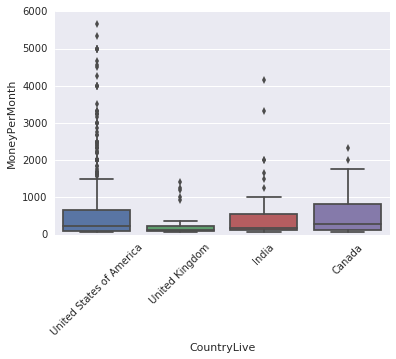

In [33]:
%%capture --no-stdout --no-display

sns.boxplot(x="CountryLive", y="MoneyPerMonth", data=coder_survey_clean)
plt.xticks(rotation=45)

In [30]:
coder_survey_clean.groupby("CountryLive").mean()["MoneyPerMonth"]

CountryLive
Canada                       93.065400
India                        81.812102
United Kingdom               45.534443
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

After keeping only the countries with larger userbase and estimating the money that user is willing to spend on learning per month we group the users by their location and calculate the average money per month for each country. In the next step we examine the outliers, remove them for each country and recalculate the means. In the end we conclude that the market most conductive for advertisement is US. We continue our analysis by estimating which of the countries has the most users that are willing to spend more than 59$ per month which is the price of our subscription.

In [31]:
coder_survey_clean = coder_survey_clean.loc[coder_survey_clean["MoneyPerMonth"] >= 59]

In [32]:
coder_survey_clean.groupby("CountryLive").size()

CountryLive
Canada                       39
India                        71
United Kingdom               43
United States of America    651
dtype: int64

We see that the second largest potential userbase of new customers comes from India so it is a second country that we should advertise in. 10% of the total number of customers comes from India, so the advertising efforts should be split accordingly. Of course the advertisement plan should be established more precisely with people from the marketing team, if one exists, for best results.